# Optimal Transport

A brief tutorial on solving Optimal Transport problems using Julia.

In [53]:
using OptimalTransport, VegaLite, LinearAlgebra, DataFrames, Distances, LaTeXStrings, Tulip, Distributions, StatsBase
using QuadGK
optimizer = Tulip.Optimizer()

Tulip.Optimizer{Float64}

### 1D Optimal Transport

Let's start by solving the case of 1-Dimensional OT problems.

The Optimal Transport Cost for 1D distributions can be obtained by:
$$
\int_0^1 h(C_\nu^{-1}(y) - C_\mu^{-1}(y)) dy
$$
Note that for the p-Wasserstein, we obtain:

$$
\int_0^1 |C_\nu^{-1}(y) - C_\mu^{-1}(y)|^p dy
$$

Where $C_\mu^{-1}$ is the quantile function for the distribution $\alpha$ (the inverse of the Cumulative Distribution Function).

Another interesting particular case occurs for $h(z) = |z|$. For such cost function, the formula coincides with:

$$
\int_\mathbb R |C_\mu(x) - C_\nu(x)| dx
$$

In [59]:
"""
`w1d2(μ::distribution,ν::distribution,p=1)`

This function calculates the p-Wasserstein Distance between two 1-Dimensional
distribution.

The calculation performed is:
```math
\\int_0^1 |C_\\mu^{-1}(r) - C_\\nu^{-1}(r)|^p dr
```
Where ``C_\\mu^{-1}`` is the quantile function.
"""
function (μ::Distributions.UnivariateDistribution,ν::Distributions.UnivariateDistribution,p=1)
    w_p(μ,ν,x,p) = abs(quantile(μ,x)-quantile(ν,x))^p
    f(x) = w_p(μ,ν,x,p)
    return quadgk(f,0,1)[1]
end

w1d2(μ,ν)

3.0

In [81]:
"""
`w1d2(μ::distribution,ν::distribution,p=1)`

This function calculates the p-Wasserstein Distance between two 1-Dimensional
distribution.

The calculation performed is:
```math
\\int_0^1 |C_\\mu^{-1}(r) - C_\\nu^{-1}(r)|^p dr
```
Where ``C_\\mu^{-1}`` is the quantile function.
"""

function otc(μ::Distributions.UnivariateDistribution,ν::Distributions.UnivariateDistribution,c)
    g(μ,ν,x) = c(quantile(μ,x),quantile(ν,x))
    f(x) = g(μ,ν,x)
    return quadgk(f,0,1)[1]
end


otc (generic function with 2 methods)

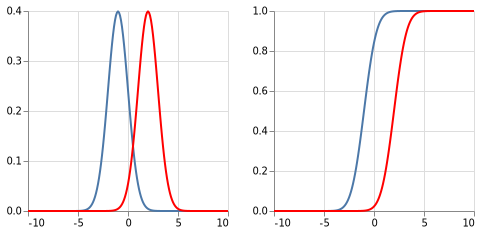

In [82]:
"""
`plotDistribution(μ::distribution,ν::distribution,x=collect(-10:0.1:10))`
'x' is the plotting domain.

This function returns both the pdfs and cdfs of the pair
of probability measures.
"""
function plotDistributions( μ::Distributions.UnivariateDistribution,
                            ν::Distributions.UnivariateDistribution,
                            x=collect(-10:0.1:10))
    
    x  = collect(-10:0.1:10)
    y  = pdf(μ,x)
    z  = pdf(ν,x);
    cy = cdf(μ,x)
    cz = cdf(ν,x);

    pdf1 = @vlplot(:line,x={x,type="quantitative"},y={y,type="quantitative"})
    pdf2 = @vlplot(:line,x={x,type="quantitative"},y={z,type="quantitative"},color={value="red"})
    pdfs = @vlplot()+ pdf1 + pdf2

    cdf1 = @vlplot(:line,x={x,type="quantitative"},y={cy,type="quantitative"})
    cdf2 = @vlplot(:line,x={x,type="quantitative"},y={cz,type="quantitative"},color={value="red"})
    cdfs = @vlplot()+ cdf1 + cdf2

    return [pdfs cdfs]
end


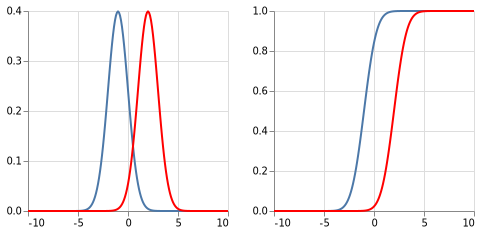

In [84]:
μ = Normal(-1)
ν = Normal(2)
y = range(0,stop=1,length=500)
q = quantile(μ,y);
c(x,y) = (y-x)^1 # h(y-x) convex function

otc(μ,ν,c)
plotDistributions(μ,ν)